# Marketing Job Market Analysis

### by Yueh-Han Chen

### Dataset Overview

> This dataset is from h1bdata.info, where has the h1b disclosure data from the United States Department of Labor (DOL).


### Research Question:
1. Which is the most popular marketing job?
2. H1B issue amounts over years?
3. Which marketing job gets paid the highest salary?
4. H1B denial rate over years?
5. Waiting days for H1B?
6. Which states offer the most H1B?
7. Which states offer the highest salaries?


## Data Wrangling

### Gather

In [17]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [18]:
#load data
df = pd.read_excel('Marketing.xlsx', 'Combine')

### Data Assessing

In [19]:
# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [20]:
df.head()

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS
0,STW TRUCK INC,Marketing Analyst,24380,"NAPLES, FL",2015-12-05 00:00:00,2015-02-10 00:00:00,DENIED
1,STW TRUCK INC D/B/A EUROPEAN FOOD MARKET,Marketing Analyst,24380,"NAPLES, FL",05/18/2015,2015-02-10 00:00:00,CERTIFIED
2,MILLENNIUM HOLDINGS GROUP,Marketing Analyst,31000,"HENDERSON, NV",02/27/2015,08/26/2015,CERTIFIED
3,CALIFORNIA OAK VALLEY GOLF & RESORT LLC,Marketing Analyst,32000,"BEAUMONT, CA",02/15/2016,08/16/2016,CERTIFIED
4,GATSBY RESTORATIONS INC,Marketing Analyst,32200,"JERICHO, NY",11/20/2015,12/15/2015,CERTIFIED


In [21]:
df.shape

(4883, 7)

In [22]:
df.describe()

,BASE SALARY
count,4883.000000
mean,55291.175097
std,22408.020433
min,672.000000
25%,44127.500000
50%,50419.000000
75%,63100.000000
max,820000.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4883 entries, 0 to 4882
Data columns (total 7 columns):
EMPLOYER       4883 non-null object
JOB TITLE      4883 non-null object
BASE SALARY    4883 non-null int64
LOCATION       4883 non-null object
SUBMIT DATE    4883 non-null object
START DATE     4883 non-null object
CASE STATUS    4883 non-null object
dtypes: int64(1), object(6)
memory usage: 267.2+ KB


In [24]:
df[df.duplicated()].shape[0]

150

### Assessment report:

**Quality issues**

- Convert "SUBMIT DATE" and "START DATE" to datetime

### Data Cleaning

**Convert "SUBMIT DATE" and "START DATE" to datetime**

**Define: use pd.to_datetime to convert data type to datetime**

#### Code

In [25]:
df["SUBMIT DATE"] = pd.to_datetime(df["SUBMIT DATE"])
df["START DATE"] = pd.to_datetime(df["START DATE"])

#### Test

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4883 entries, 0 to 4882
Data columns (total 7 columns):
EMPLOYER       4883 non-null object
JOB TITLE      4883 non-null object
BASE SALARY    4883 non-null int64
LOCATION       4883 non-null object
SUBMIT DATE    4883 non-null datetime64[ns]
START DATE     4883 non-null datetime64[ns]
CASE STATUS    4883 non-null object
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 267.2+ KB


## Exploratory Data Analysis

> Build Visualization Function: desc()

In [87]:
def desc(size=None, title=None, xscale=None, yscale=None, xlabel=None, ylabel=None, xlim=None, ylim=None, xticks1=None, xticks2=None, yticks1=None, yticks2=None,legend_title=None, legend_labels=None):
    # this function must be placed above the code of the plots
    if size:
        plt.figure(figsize=size)
    if title:
        plt.title(title);
    if xscale:
        plt.xscale(xscale);
    if yscale:
        plt.yscale(yscale);
    if xlabel:
        plt.xlabel(xlabel);
    if ylabel:
        plt.ylabel(ylabel);
    if xlim:
        plt.xlim(xlim);
    if ylim:
        plt.ylim(ylim);
    if xticks1:
        plt.xticks(xticks1, xticks2);
    if yticks1:
        plt.yticks(yticks1, yticks2);
    if legend_title:
        plt.legend(title=legend_title);
        if legend_labels:
            plt.legend(title=legend_title, labels=legend_labels);

## Research Question 1: Proportion by Differrent Marketing Job 

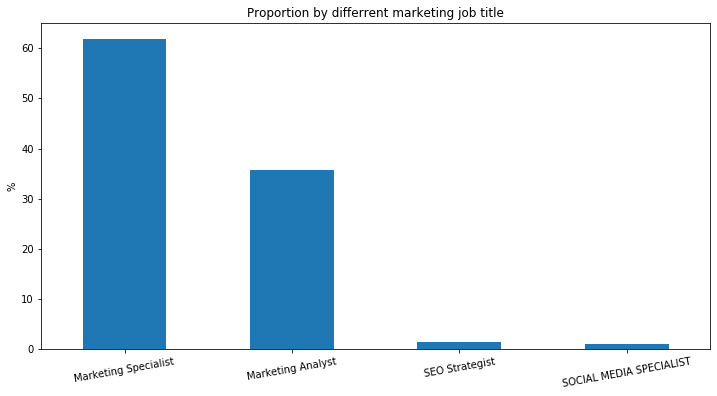

In [88]:
desc(title='Proportion by differrent marketing job title', ylabel='%', size=(12,6))
((df['JOB TITLE'].value_counts()/df.shape[0])*100).plot.bar()
plt.xticks(rotation=10);

> Note: Two most popular marketing jobs: Marketing Specialist(60%) & Marketing Analyst(35%)


## Research Question 2: H1B issue amounts over years?

In [89]:
df['JOB TITLE'].value_counts()

Marketing Specialist       3023
Marketing Analyst          1746
SEO Strategist               67
SOCIAL MEDIA SPECIALIST      47
Name: JOB TITLE, dtype: int64

In [90]:
df_MS = df[df['JOB TITLE'] == 'Marketing Specialist']
df_MA = df[df['JOB TITLE'] == 'Marketing Analyst']
df_SS = df[df['JOB TITLE'] == 'SEO Strategist']
df_SMS = df[df['JOB TITLE'] == 'SOCIAL MEDIA SPECIALIST']

In [91]:
df_MS['year'] = df_MS['SUBMIT DATE'].dt.year
df_MA['year'] = df_MA['SUBMIT DATE'].dt.year
df_SS['year'] = df_SS['SUBMIT DATE'].dt.year
df_SMS['year'] = df_SMS['SUBMIT DATE'].dt.year

In [92]:
temp1 = df_MS.year.value_counts().to_frame()
temp1.rename(columns={'year':'Marketing Specialist'}, inplace=True)

temp2 = df_MA.year.value_counts().to_frame()
temp2.rename(columns={'year':'Marketing Analyst'}, inplace=True)

temp3 = df_SS.year.value_counts().to_frame()
temp3.rename(columns={'year':'SEO Strategist'}, inplace=True)

temp4 = df_SMS.year.value_counts().to_frame()
temp4.rename(columns={'year':'SOCIAL MEDIA SPECIALIST'}, inplace=True)

In [93]:
df_list = [temp1, temp2, temp3, temp4]
for d in df_list:
    d['Year'] = 0
    for i in range(0,d.shape[0]):
        d['Year'][i:i+1] = d[i:i+1].index.values[0]

In [94]:
temp1.sort_values(by='Year', ascending=False, inplace = True)
temp2.sort_values(by='Year', ascending=False, inplace = True)
temp3.sort_values(by='Year', ascending=False, inplace = True)
temp4.sort_values(by='Year', ascending=False, inplace = True)

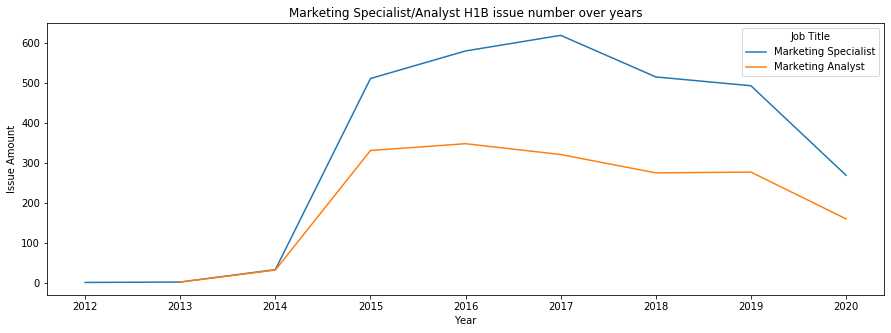

In [95]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot('Year', 'Marketing Specialist', data=temp1) 
ax.plot('Year', 'Marketing Analyst', data=temp2) 
desc(title='Marketing Specialist/Analyst H1B issue number over years', xlabel = 'Year', ylabel='Issue Amount' , legend_title='Job Title')

> Note: Compare to the **33%** dropped of F-1 VISA as a whole from 2015 to 2019, the **13%** dropped means that the needs for these two marketing jobs were still in demand and growing, so it dropped mainly due to the context of policy. In 2020, we have the lowest H1B amount because of the COVID-19. And also because the data science and AI are getting more popular in the next 5 to 10 years, which will make marketing analysts with technical skills even more popular in the future.


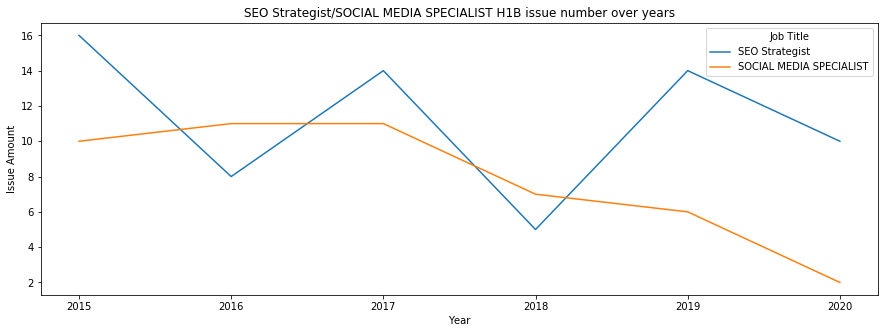

In [96]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot('Year', 'SEO Strategist', data=temp3) 
ax.plot('Year', 'SOCIAL MEDIA SPECIALIST', data=temp4) 

desc(title='SEO Strategist/SOCIAL MEDIA SPECIALIST H1B issue number over years', xlabel = 'Year', ylabel='Issue Amount', legend_title='Job Title')

> Note: Since the sample sizes of SEO Strategists and Social Media Specialists are too small, so their variances are high. 

## Research Question 3: H1B approval rate over years?

In [97]:
df['CASE STATUS'].value_counts()

CERTIFIED                4432
WITHDRAWN                 224
DENIED                    216
CERTIFIED - WITHDRAWN      11
Name: CASE STATUS, dtype: int64

In [98]:
temp1['Approval_rate'] = None
temp2['Approval_rate'] = None
temp3['Approval_rate'] = None
temp4['Approval_rate'] = None

for y in range(2015, 2021):
    temp1['Approval_rate'][y] = round(df_MS[(df_MS.year == y) & (df_MS['CASE STATUS'] == "CERTIFIED")].shape[0]/df_MS[df_MS.year == y].shape[0], 3)
for y in range(2015, 2021):
    temp2['Approval_rate'][y] = round(df_MA[(df_MA.year == y) & (df_MA['CASE STATUS'] == "CERTIFIED")].shape[0]/df_MA[df_MA.year == y].shape[0], 3)
for y in range(2015, 2021):
    temp3['Approval_rate'][y] = round(df_SS[(df_SS.year == y) & (df_SS['CASE STATUS'] == "CERTIFIED")].shape[0]/df_SS[df_SS.year == y].shape[0], 3)
for y in range(2015, 2021):
    temp4['Approval_rate'][y] = round(df_SMS[(df_SMS.year == y) & (df_SMS['CASE STATUS'] == "CERTIFIED")].shape[0]/df_SMS[df_SMS.year == y].shape[0], 3)

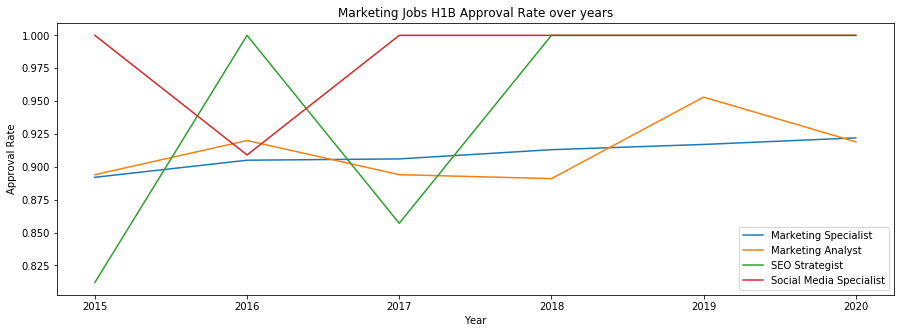

In [99]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot('Year', 'Approval_rate', data=temp1) 
ax.plot('Year', 'Approval_rate', data=temp2) 
ax.plot('Year', 'Approval_rate', data=temp3) 
ax.plot('Year', 'Approval_rate', data=temp4) 
desc(title='Marketing Jobs H1B Approval Rate over years', xlabel = 'Year', ylabel='Approval Rate' , legend_title='Job Title')
ax.legend(['Marketing Specialist',"Marketing Analyst",'SEO Strategist','Social Media Specialist']);

> Note: In the graph, we can see that from 2015 to 2019, the approval rate of marketing Specialists increased nearly **2.5%**, and the approval rate of marketing analyst increased nearly **5%**. And for SEO Strategists and Social Media specialist, since their sample sizes are too small, only have 3% of all H1B, so their variance are very high, but from 2018 to 2020, they all got approved.


## Research Question 4: Waiting days for H1B?

In [100]:
df['waiting_days'] = None
for i in range(0, df.shape[0]):
    if (df['START DATE'][i:i+1] - df['SUBMIT DATE'][i:i+1])[i].days >= 0:
        df['waiting_days'][i:i+1] = (df['START DATE'][i:i+1] - df['SUBMIT DATE'][i:i+1])[i].days
    else:
        df['waiting_days'][i:i+1] = -1

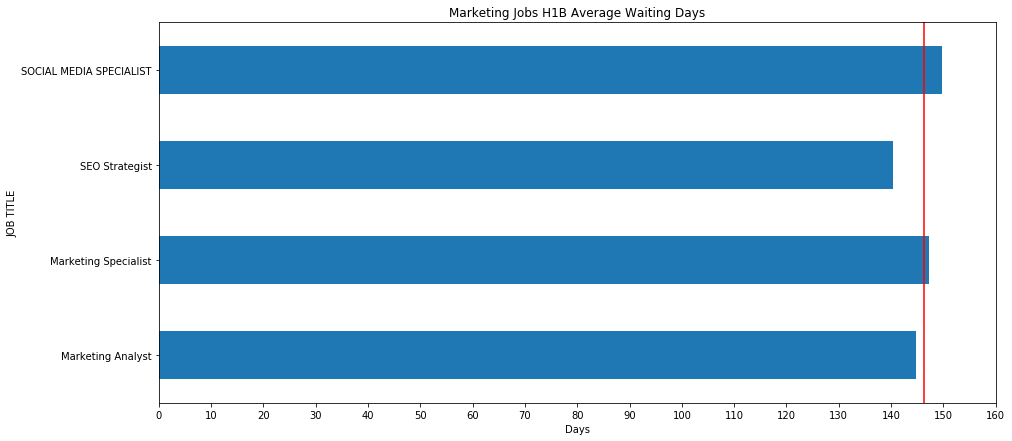

In [101]:
df_have_waiting_days = df[(df['waiting_days'] != -1) & (df['CASE STATUS'] == 'CERTIFIED')]
desc(title='Marketing Jobs H1B Average Waiting Days', xlim=(0,160), xlabel = 'Days', size=(15,7), xticks1=range(0,170,10))
df_have_waiting_days.groupby('JOB TITLE')['waiting_days'].mean().plot.barh()
plt.axvline(x=df_have_waiting_days['waiting_days'].mean(), color = 'red');

In [102]:
df_have_waiting_days['waiting_days'].mean()

146.3319343761923

> Note: Marketing H1B Waiting Days in average is **147 days, which is lower than the average H1b processing time(6 months)**, according to https://www.immi-usa.com/h1b-processing-time/

## Research Question 5 Which states offer the most H1B for marketing?

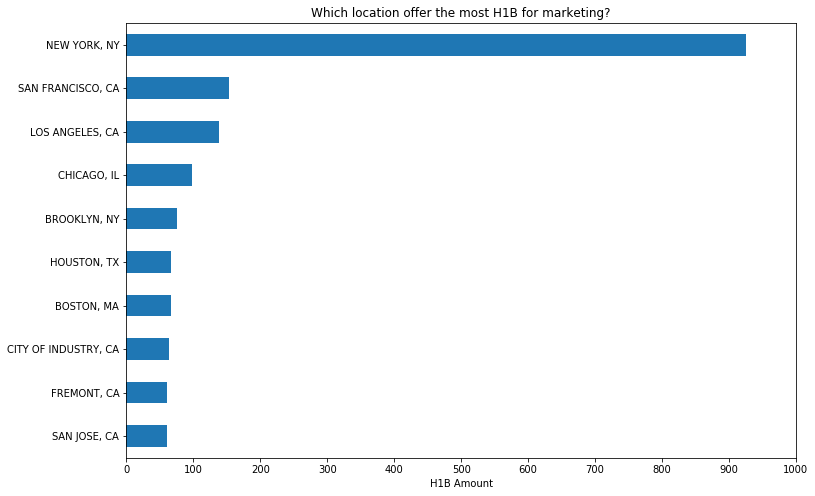

In [103]:
desc(title='Which location offer the most H1B for marketing?', xlim=(0,1000), xlabel = 'H1B Amount', size=(12,8),xticks1=(range(0,1100,100)))
df.LOCATION.value_counts()[0:10].sort_values().plot.barh();

> Note: Marketing H1B Issue Amount Rank by location: **New York > San Francisco > Los Angeles**


## Research Question 6: Which marketing job gets paid the highest salary?

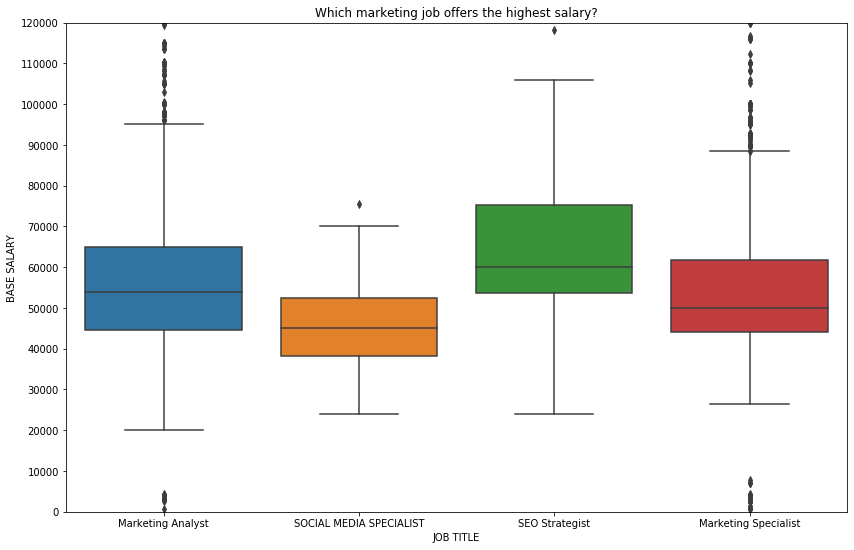

In [104]:
desc(title='Which marketing job offers the highest salary?', ylim=(0,120000), yticks1=range(0,130000,10000), size=(14,9))
sb.boxplot(data = df, x = 'JOB TITLE', y = 'BASE SALARY');

> Note: Salary Rank by job title: **SEO Strategist > Marketing Analyst > Marketing Specialist**

## Research Question 7: Which states offer the highest salaries?

In [105]:
df_top_locations = df[df.LOCATION == 'NEW YORK, NY']
for city in df.LOCATION.value_counts()[1:10].index:
    df_top_locations = df_top_locations.append(df[df.LOCATION == city])

In [106]:
list = df_top_locations.groupby('LOCATION')['BASE SALARY'].median().sort_values().index

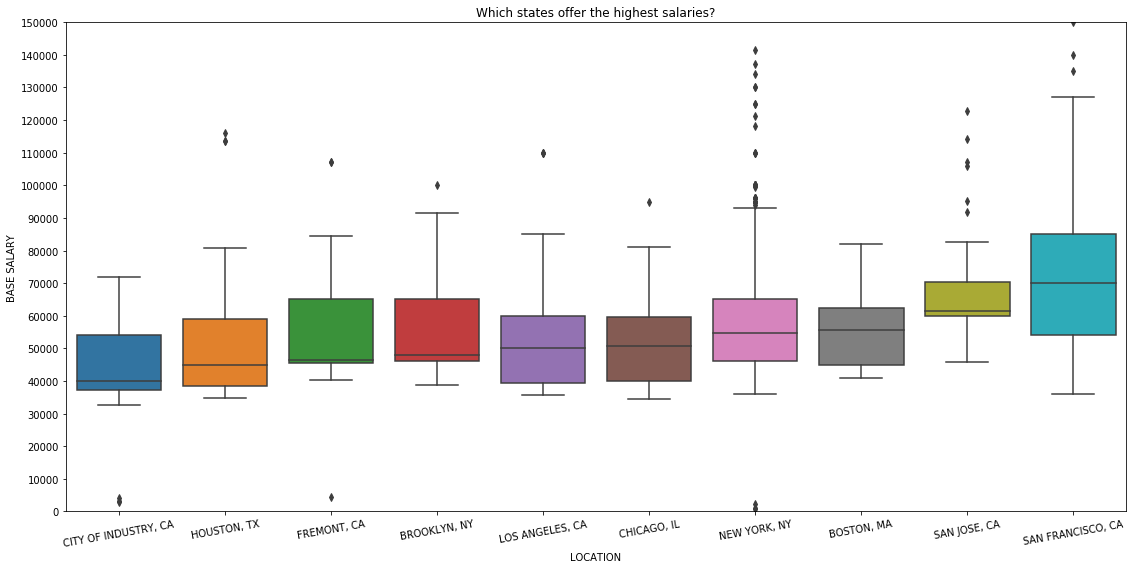

In [107]:
desc(title='Which states offer the highest salaries?', ylim=(0,150000), yticks1=range(0,160000,10000), size=(19,9))
sb.boxplot(data = df_top_locations, x = 'LOCATION', y = 'BASE SALARY', order=list)
plt.xticks( rotation = 10 );

> Note: Marketing Salary Rank by location: **San Francisco > San Jose > Boston**

## Conclusion

> Limitation 1: All these data are disclosure date from h1bdata.info, so we don't know how many unpublished data out there. Therefore, we should have some degree doubt the numbers presented above.

#### 1. Two most popular marketing jobs: Marketing Specialist(60%) & Marketing Analyst(35%)
#### 2. Salary Rank by job title: SEO Strategist > Marketing Analyst > Marketing Specialist
#### 3. The demand for Marketing Analysts is predicted to increase with the trend of data science.
#### 4. Marketing H1B Average Waiting Days is 147 days, so don’t panic.
#### 5. In-demand skills: Google Analytics > Excel > SQL > Python > Machine Learning 
#### 6. Marketing Salary Rank by location: San Francisco > San Jose > Boston
#### 7. Marketing H1B Issue Amount Rank by location: New York > San Francisco > Los Angeles 
